# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [10]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from cv2 import imread
import matplotlib.pyplot as plt

Create a function that will capture and save the image from your webcam

In [19]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [20]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [32]:
img_path = "perfume.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image

    img_path = "dog_water.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

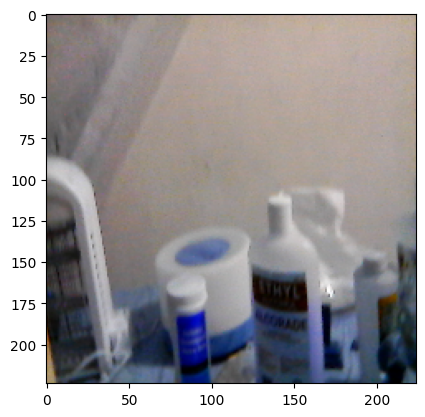

In [33]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [34]:
from keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [35]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [36]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n03937543,pill_bottle,0.383270
1,n03742115,medicine_chest,0.205334
2,n03690938,lotion,0.161872
3,n03476991,hair_spray,0.076857
4,n04357314,sunscreen,0.042751
5,n03825788,nipple,0.030713
6,n04376876,syringe,0.009606
7,n04557648,water_bottle,0.008915
8,n03843555,oil_filter,0.007261
9,n03916031,perfume,0.006844


Interpret the result of prediction using VGG16 model

The results that are listed using the VGG16 model is the lists of objects that are present in the picture that is captured by the camera. the first column is the predicted class and the second is the predicted name of the object while the last column  is the probability that the model is right about the object.

Use Resnet50 pretrained model

In [37]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

102967424/102967424 [==============================] - 15s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                   

Predict the result

In [38]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 4s 4s/step


,Predicted Class,Name,Probability
0,n03742115,medicine_chest,0.613527
1,n03937543,pill_bottle,0.155942
2,n04376876,syringe,0.073793
3,n03690938,lotion,0.038468
4,n04357314,sunscreen,0.006474
5,n02815834,beaker,0.005918
6,n03141823,crutch,0.005161
7,n03482405,hamper,0.004859
8,n03983396,pop_bottle,0.004237
9,n03476991,hair_spray,0.003882


Interpret the result using RESNET50 pretrained model

For the results using RESNET50, it shows what is in the picture but different from the VGG16 model and I think the VGG16 has better prediction than RESNET50. But it differs for every picture that is shown or used in the models.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

In [72]:
#VGG19
from keras.applications import vgg19
vgg19_model = vgg19.VGG19(weights='imagenet')
vgg19_model.summary()

574710816/574710816 [==============================] - 82s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [74]:
predict_image(vgg19_model, img_path, vgg19.preprocess_input, vgg19.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n03937543,pill_bottle,0.446748
1,n03690938,lotion,0.126378
2,n03742115,medicine_chest,0.124048
3,n04376876,syringe,0.059415
4,n03476991,hair_spray,0.032439
5,n03825788,nipple,0.032061
6,n04557648,water_bottle,0.023418
7,n02815834,beaker,0.021018
8,n04357314,sunscreen,0.020330
9,n04560804,water_jug,0.013624


In [76]:
#xception 
from keras.applications import xception

xception_model = xception.Xception(weights='imagenet')
xception_model.summary()

91884032/91884032 [==============================] - 11s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_9[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activa

In [82]:
predict_image(xception_model, img_path, xception.preprocess_input, xception.decode_predictions, (299,299))

1/1 [==============================] - 6s 6s/step


,Predicted Class,Name,Probability
0,n03742115,medicine_chest,0.326341
1,n03690938,lotion,0.236561
2,n04376876,syringe,0.038960
3,n04254120,soap_dispenser,0.034874
4,n02815834,beaker,0.029407
5,n03476991,hair_spray,0.029097
6,n03937543,pill_bottle,0.026424
7,n04357314,sunscreen,0.018514
8,n04553703,washbasin,0.016707
9,n04557648,water_bottle,0.004361


In [81]:
#DENSENET
from keras.applications import densenet

densenet_model = densenet.DenseNet201(weights='imagenet')
densenet_model.summary()

82524592/82524592 [==============================] - 11s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_10[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormal

In [83]:
predict_image(densenet_model, img_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 [==============================] - 14s 14s/step


,Predicted Class,Name,Probability
0,n03937543,pill_bottle,0.468340
1,n03742115,medicine_chest,0.204183
2,n04376876,syringe,0.046546
3,n03476991,hair_spray,0.033709
4,n04557648,water_bottle,0.032189
5,n02786058,Band_Aid,0.020239
6,n03690938,lotion,0.019092
7,n04070727,refrigerator,0.014203
8,n04357314,sunscreen,0.012573
9,n15075141,toilet_tissue,0.009341


#### Conclusion

To conclude, in this hands on activity, we learned to use pre trained models of keras in cnn. In procedure, it introduced to us how to use pre trained model such as VGG16 and ResNet50 and both have different approach or predictions to the image that is saved. In supplementary, I used other pre-trained models such as xception, VGG19, densenet, and it shows different predictions again on the saved image.